In [41]:

import time


class Session():
    def __init__(self,chunk_hash,from_addr,limit_time):
        self.chunk_hash=chunk_hash
        self.from_addr=from_addr
        self.start_time = 0
        self.limit_time = limit_time
        self.cwnd = 1
        self.ssthresh = 64
        self.dupAck = 0

    #每一次sender 发送data 启动
    def startTime(self):
        self.start_time = time.time()

    #每一次time_out 则进行重新传
    def is_time_out(self):
        if(time.time()-self.start_time>self.limit_time):
            print(self.limit_time)
            print("time out and reset the time")
            self.start_time = time.time()



connection = dict()
connection[1] = Session(1,1,5)
connection[2] = Session(2,1,5)



connection[1].startTime()
connection[2].startTime()

while True:
    connection[1].is_time_out()
    connection[2].is_time_out()


#整一个观察者模式的可以的

5
time out and reset the time
5
time out and reset the time


KeyboardInterrupt: 

In [42]:
#简化模式


1

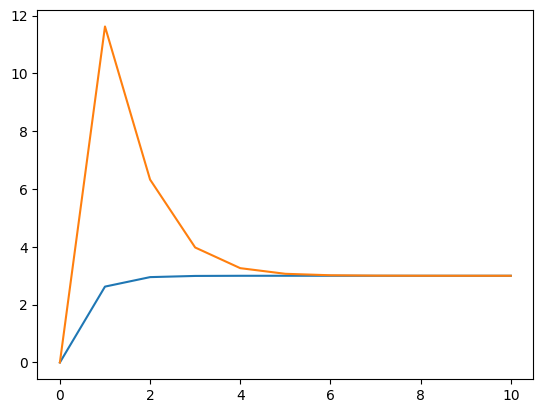

In [55]:
#自适应性计算时间法
#EstimateRTT 已知
#simple RTT 刚计算,通过sender中的recive ack 这个ack应该是指定的（待会再看）

DevRTT = 0
EstimateRTT = 0
Timeout = 0

list1 = []
list2 = []
list3 = []

list1.append(EstimateRTT)
list2.append(DevRTT)
list3.append(Timeout)


#这个4应该是有问题吧
def adapterTimeout(DevRTT,EstimateRTT,simpleRTT):
    newEstimateRTT  = 0.125*EstimateRTT+0.875*simpleRTT
    newDevRTT = 0.25*DevRTT+0.75*abs(simpleRTT-EstimateRTT)
    newTimeOut =newEstimateRTT+4*newDevRTT
    return newEstimateRTT,newDevRTT,newTimeOut

for _ in range(10):
    # global EstimateRTT
    # global DevRTT
    # global Timeout
    EstimateRTT,DevRTT,Timeout = adapterTimeout(DevRTT,EstimateRTT,3)

    list1.append(EstimateRTT)
    list2.append(DevRTT)
    list3.append(Timeout)

plt.plot(range(11),list1)
# plt.plot(range(11),list2)
plt.plot(range(11),list3)



#这个timeout有两种机制



In [39]:

model = Session(1,1,30)
model.startTime()





第 0 轮： ，拥塞窗口大小： 1
第 1 轮： ，拥塞窗口大小： 2
第 2 轮： ，拥塞窗口大小： 4


/Users/zhuhe/opt/anaconda3/envs/CSNetwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhuhe/opt/anaconda3/envs/CSNetwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhuhe/opt/anaconda3/envs/CSNetwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhuhe/opt/anaconda3/envs/CSNetwork/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhuhe/opt/anaconda3/envs/CSNetwork/lib/python3.8/site-packages/IPython/core/p

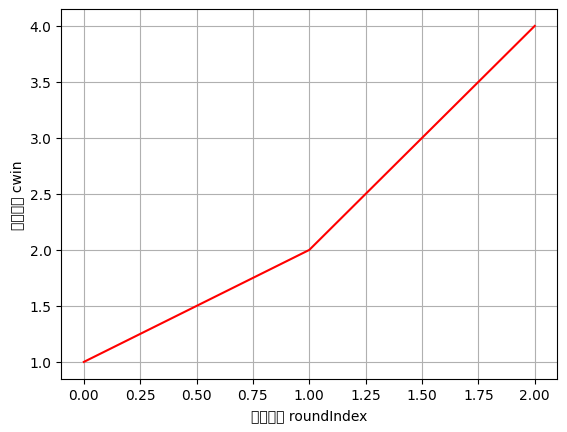

In [22]:
import numpy as np
from matplotlib import pyplot as plt


#程序输入-------

'''测试数据
1
16
12
-1
22

1
16
12
21
26
'''

cwin = eval(input('请输入初始拥塞窗口大小：')) #拥塞窗口
ssthresh = eval(input('请输入初始阈值大小：')) #初始阈值

#是否超时 >0-True  -1-False
ifTimeoutRoundIndex = eval(input('请输入超时发生时的传输轮次（没有则输-1）：')) #超时发生时的传输轮次

#是否重传 >0-True  -1-False
ifReTransmissionRoundIndex = eval(input('请输入重传发生时的传输轮次（没有则输-1）：')) #重传发生时的传输轮次

roundCount = eval(input("请输入传输轮次：")) #传输轮次


#算法----------

listXResult = [] #后期绘图用的x坐标集（此处直接用roundCount算出也可以）
listYResult = [] #后期绘图用的y坐标集


for roundIndex in range(roundCount):
    print("第", roundIndex, "轮：", "，拥塞窗口大小：", cwin)

    #图：收集x, y坐标
    listXResult.append(roundIndex)
    listYResult.append(cwin)

    #先判断，是否超时或重传------------

    #---若超时--->转-慢开始
    if (roundIndex == ifTimeoutRoundIndex):
        ssthresh = cwin // 2
        cwin = 1
        continue
    #---若重传--->转-快重传
    if (roundIndex == ifReTransmissionRoundIndex):
        ssthresh = cwin // 2
        cwin = ssthresh
    #--------------------------------

    #+++++++慢开始
    #【拥塞窗口 < 初始阈值】
    if (cwin < ssthresh):
        cwin *= 2
        #避免因x2而越界
        if (cwin > ssthresh):
            cwin = ssthresh

    #+++++++拥塞避免
    #【拥塞窗口 > 初始阈值 且 当前轮次 < 超时发生时的传输轮次】
    elif (cwin >= ssthresh):
        cwin += 1



#程序输出-------
# print("----------------------------------")
# print(listXResult)
# print(listYResult)

plt.xlabel("传输次数 roundIndex")
plt.ylabel("拥塞窗口 cwin")
plt.plot(listXResult, listYResult, 'r')
plt.grid()#添加网格
plt.show()




In [2]:
class Student(object):

    def __init__(self, name, score):
        self.name = name
        self.score = score

In [3]:
bart = Student('Bart Simpson', 59)
bart.name

'Bart Simpson'

In [1]:
a ={}
a[1] = 2
a['a'] = 3

In [2]:
b ={}
b[1] = 2
b['a'] = 3

In [6]:
list(a.keys())+list(b.keys())

[1, 'a', 1, 'a']

In [7]:
recv_table = dict()
[recv_table[i].from_peer for i in recv_table.keys()]


[]

In [ ]:
recv_table = dict()


class RecvSession:
    def __init__(self,sock,chunkhash):
        #这个表示已经接收到了什么
        self.acc_seq = 0
        self.start_time = 0
        self.crash_time =5
        self.sock =sock
        self.chunkhash =chunkhash


        #dict
    def startTime(self):
        self.start_time = time.time()


    #f
    def is_time_out(self):
        if(time.time()-self.start_time>self.crash_time):

            send_Whohas(self.sock)
            recv_table.pop(self.chunk_hash)
            self.startTime()